In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.head()

,S No.,Model,Year,Price,Transmission,Kms_driven,FuelType,Tax,MPG,EngineSize
0,1,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,2,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,3,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,4,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,5,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.describe()

,S No.,Year,Price,Kms_driven,Tax,MPG,EngineSize
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4500.500000,2017.278333,23349.564778,23039.617778,125.601667,50.577711,1.922900
std,2598.220545,1.905588,11650.107698,21200.996790,62.517842,12.663055,0.603193
min,1.000000,2003.000000,1975.000000,1.000000,0.000000,19.300000,0.000000
25%,2250.750000,2016.000000,15950.000000,5675.500000,125.000000,40.900000,1.500000
50%,4500.500000,2017.000000,20700.000000,17715.500000,145.000000,49.600000,2.000000
75%,6750.250000,2019.000000,27995.750000,34302.250000,145.000000,57.600000,2.000000
max,9000.000000,2020.000000,145000.000000,152034.000000,580.000000,188.300000,5.200000


In [4]:
df.shape

(9000, 10)

In [5]:
df.isnull().sum()

S No.           0
Model           0
Year            0
Price           0
Transmission    0
Kms_driven      0
FuelType        0
Tax             0
MPG             0
EngineSize      0
dtype: int64

In [6]:
columns = ['Model','Transmission','FuelType']
for col in columns:
    print([col]," : ")
    print(df[col].value_counts(),"\n")

['Model']  : 
 A3     1608
 Q3     1228
 A4     1146
 A1     1130
 Q5      757
 A5      741
 Q2      730
 A6      629
 Q7      332
 TT      278
 A7      103
 A8       97
 Q8       62
 RS6      30
 RS5      25
 RS3      25
 RS4      24
 R8       23
 SQ5      10
 S4        9
 S3        7
 SQ7       5
 S8        1
Name: Model, dtype: int64 

['Transmission']  : 
Manual       3645
Semi-Auto    3536
Automatic    1819
Name: Transmission, dtype: int64 

['FuelType']  : 
Diesel    4635
Petrol    4342
Hybrid      23
Name: FuelType, dtype: int64 



In [7]:
df.dtypes

S No.             int64
Model            object
Year              int64
Price             int64
Transmission     object
Kms_driven        int64
FuelType         object
Tax               int64
MPG             float64
EngineSize      float64
dtype: object

In [8]:
df['Year_Gap'] = 2021 - df['Year']
df = df.drop(['Year'],axis=1)
df = df.drop(['S No.'],axis=1)
df.head()

,Model,Price,Transmission,Kms_driven,FuelType,Tax,MPG,EngineSize,Year_Gap
0,A1,12500,Manual,15735,Petrol,150,55.4,1.4,4
1,A6,16500,Automatic,36203,Diesel,20,64.2,2.0,5
2,A1,11000,Manual,29946,Petrol,30,55.4,1.4,5
3,A4,16800,Automatic,25952,Diesel,145,67.3,2.0,4
4,A3,17300,Manual,1998,Petrol,145,49.6,1.0,2


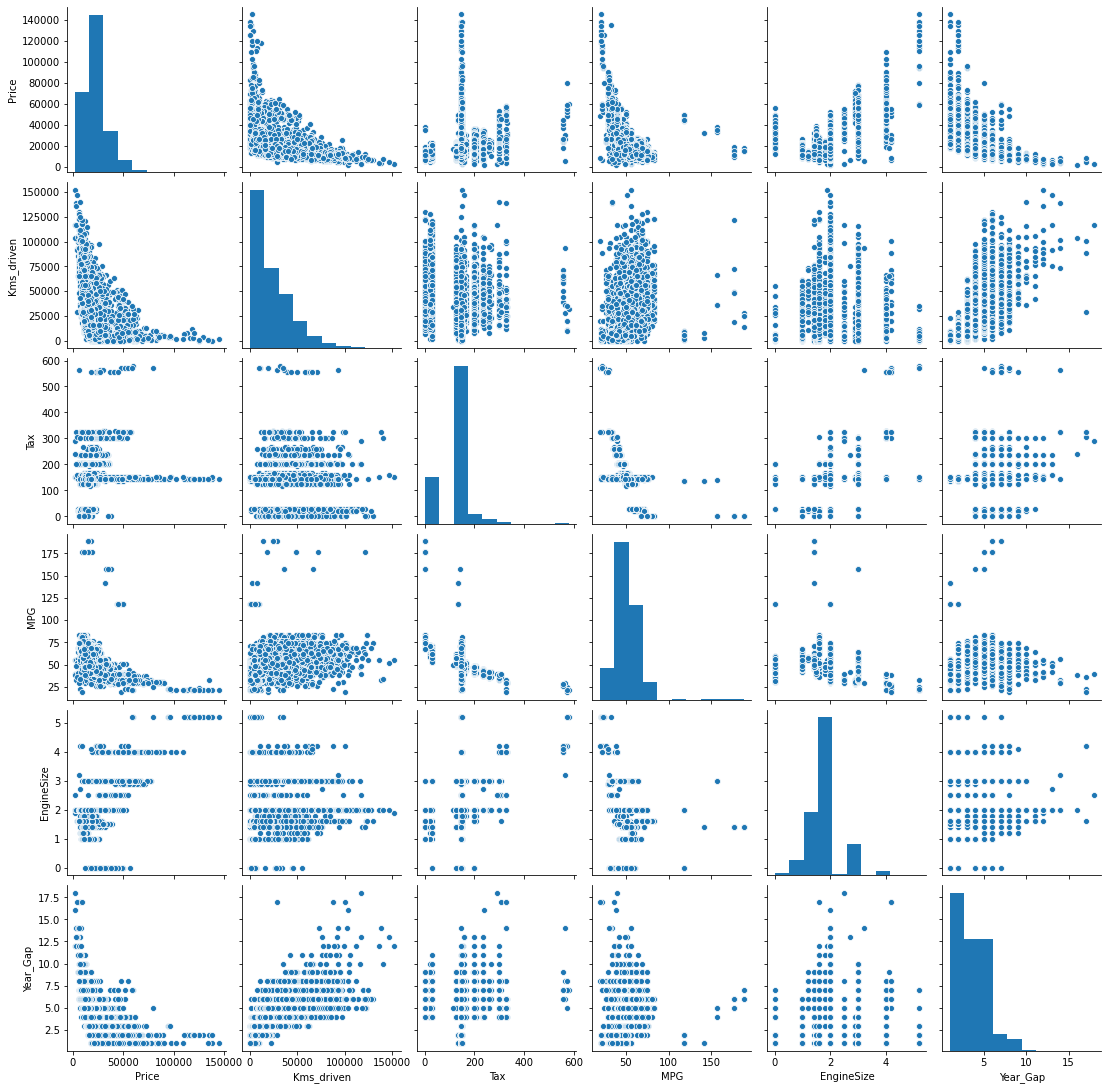

In [9]:
sns.pairplot(df)

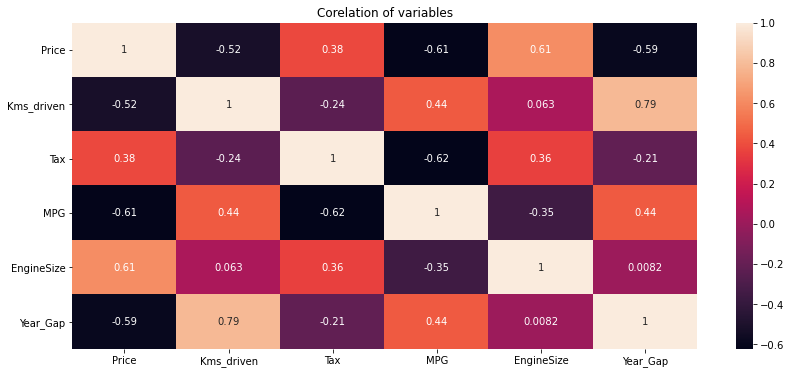

In [10]:
corr_df = df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr_df,annot=True)
plt.title("Corelation of variables")
plt.show()

In [11]:
print(df.Transmission.unique())
print(df.FuelType.unique())

['Manual' 'Automatic' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid']


In [12]:
df.Transmission.replace(regex={"Manual":"0","Automatic":"1","Semi-Auto":"2"},inplace=True)
df.FuelType.replace(regex={"Petrol":"0","Diesel":"1","Hybrid":"2"},inplace=True)
df[["Transmission","FuelType"]] = df[["Transmission","FuelType"]].astype(int)

In [13]:
df = pd.get_dummies(df,drop_first=True)

In [14]:
df.head()

,Price,Transmission,Kms_driven,FuelType,Tax,MPG,EngineSize,Year_Gap,Model_ A3,Model_ A4,...,Model_ RS3,Model_ RS4,Model_ RS5,Model_ RS6,Model_ S3,Model_ S4,Model_ S8,Model_ SQ5,Model_ SQ7,Model_ TT
0,12500,0,15735,0,150,55.4,1.4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16500,1,36203,1,20,64.2,2.0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11000,0,29946,0,30,55.4,1.4,5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16800,1,25952,1,145,67.3,2.0,4,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17300,0,1998,0,145,49.6,1.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y = df['Price']
X = df.drop(['Price'],axis=1)

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,shuffle=True,random_state=5)

In [17]:
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()
l_reg.fit(X_train,y_train)

y_predict_linear = l_reg.predict(X_test)

from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
print("accuracy train : {}".format(l_reg.score(X_train,y_train)))
print("accuracy test : {}".format(l_reg.score(X_test,y_test)))
print("rms error : {}".format(np.sqrt(mean_squared_error(y_test,y_predict_linear))))
print("r2 score : {}".format(r2_score(y_test,y_predict_linear)))

accuracy train : 0.8839016658527938
accuracy test : 0.8838897678186843
rms error : 3981.0522676597197
r2 score : 0.8838897678186843


In [18]:
y_predict_kf_linear = cross_val_predict(l_reg,X_train,y_train)
print("r2 score : {}".format(r2_score(y_train,y_predict_kf_linear)))

r2 score : 0.8788786343659006


In [19]:
scores = cross_val_score(l_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(np.sqrt(-scores))

[3701.67969857 4203.91408968 4013.88464771 4245.3121386  4058.46298409]


In [20]:
print('Intercept: \n',l_reg.intercept_)
print('Coefficients: \n',l_reg.coef_)

Intercept: 
 25215.256997805154
Coefficients: 
 [ 9.50578349e+02 -9.43967042e-02 -6.38619532e+02 -1.92016066e+01
 -9.39483293e+01  5.72054712e+03 -2.26283612e+03  1.75704119e+03
  1.93512470e+03  3.60246493e+03  4.57826677e+03  4.90409792e+03
  8.61298577e+03  2.12199668e+03  4.40089734e+03  9.15634957e+03
  1.76392095e+04  2.71096446e+04  6.52738473e+04  1.13453122e+04
  2.38650555e+04  2.16924887e+04  2.92570664e+04  6.87131433e+03
  1.47666246e+04  3.49394406e+03  1.47711012e+04  2.15302784e+04
  4.27393873e+03]


Text(0, 0.5, 'Predictions')

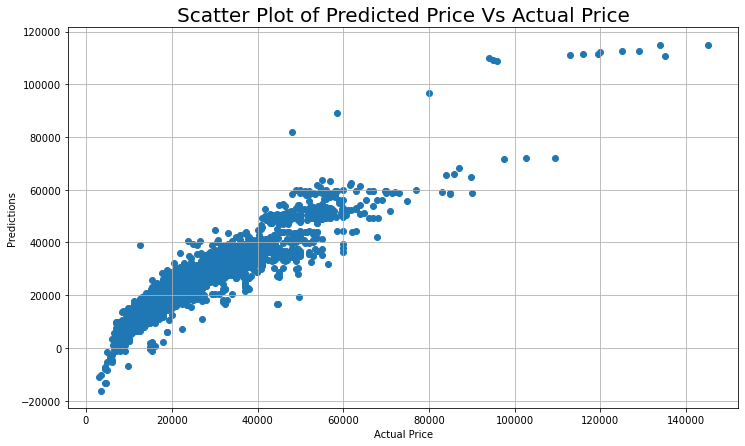

In [21]:
y_pred = l_reg.predict(X_train)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted Price Vs Actual Price', y=1, size=20)
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predictions")

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=4, random_state=42, min_samples_leaf=10)
dt_reg.fit(X_train,y_train)
y_predict_dt = dt_reg.predict(X_test)
print("accuracy train : {}".format(dt_reg.score(X_train,y_train)))
print("accuracy test : {}".format(dt_reg.score(X_test,y_test)))
print("rms error : {}".format(np.sqrt(mean_squared_error(y_test,y_predict_dt))))
print("r2 score : {}".format(r2_score(y_test,y_predict_dt)))

accuracy train : 0.8028326591022186
accuracy test : 0.81464349306906
rms error : 5029.983391113441
r2 score : 0.81464349306906


Text(0, 0.5, 'Predictions')

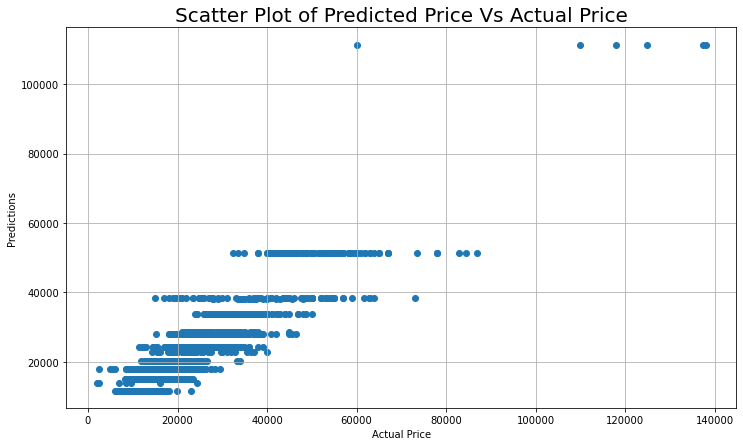

In [23]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted Price Vs Actual Price', y=1, size=20)
plt.scatter(y_test, y_predict_dt)
plt.xlabel("Actual Price")
plt.ylabel("Predictions")

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [25]:
rf_reg.fit(X_train,y_train)
y_predict_rf = rf_reg.predict(X_test)
print("accuracy train : {}".format(rf_reg.score(X_train,y_train)))
print("accuracy test : {}".format(rf_reg.score(X_test,y_test)))
print("rms error : {}".format(np.sqrt(mean_squared_error(y_test,y_predict_rf))))
print("r2 score : {}".format(r2_score(y_test,y_predict_rf)))

accuracy train : 0.9928681763417095
accuracy test : 0.9665245227924775
rms error : 2137.5979345585765
r2 score : 0.9665245227924775


In [26]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200,400,600,800,1000,1200]
# max_features = ['auto','sqrt']
max_depth = [5,10,15,20,25]
min_samples_split = [2,5,10,15,25]
min_samples_leaf = [1,2,5,10]

random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [27]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   9.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   9.9s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=  11.0s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   9.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   9.2s
[CV] n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20, total=  32.7s
[CV] n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20, total=  34.7s
[CV] n_estimators=1200, min_samples_s

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_depth=15, total=  10.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 25],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_depth': 15}

In [29]:
rf_random.best_score_

-8452002.10348088

Text(0, 0.5, 'Predictions')

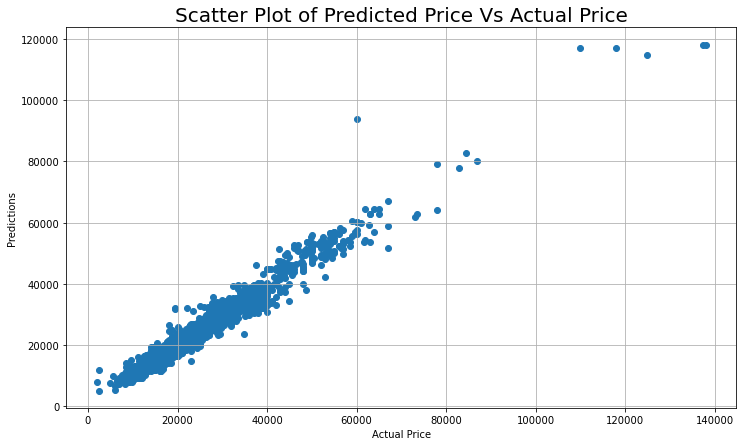

In [30]:
y_pred_rf = rf_random.predict(X_test)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title('Scatter Plot of Predicted Price Vs Actual Price', y=1, size=20)
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predictions")

In [31]:
print("rms error : {}".format(np.sqrt(mean_squared_error(y_test,y_pred_rf))))
print("r2 score : {}".format(r2_score(y_test,y_pred_rf)))

rms error : 2325.3954898727666
r2 score : 0.9603842040492644


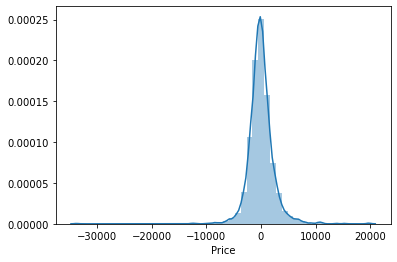

In [32]:
rf_predictions=rf_random.predict(X_test)
sns.distplot(y_test-rf_predictions)

In [ ]:
scores = cross_val_score(rf_random, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.4s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.4s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20, total=  26.8s
[CV] n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20, total=  26.8s
[CV] n_estimators=1200, min_samples_s

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_depth=15, total=   8.9s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.0min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20, total=  27.4s
[CV] n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=25, min_samples_leaf=2, max_depth=20, total=  26.9s
[CV] n_estimators=1200, min_samples_s

[CV]  n_estimators=400, min_samples_split=15, min_samples_leaf=10, max_depth=15, total=   8.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.9min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.6s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 
[CV]  n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5, total=   8.5s
[CV] n_estimators=600, min_samples_split=15, min_samples_leaf=10, max_depth=5 


In [ ]:
print(lin_rmse_scores)
print(lin_rmse_scores.std())

In [ ]:
print("Score: %.2f" % rf_random.score(X_test,y_test))

In [ ]:
print("Linear Regression -> r2 score : {}".format(r2_score(y_test,y_predict_linear)))
print("Decision Tree     -> r2 score : {}".format(r2_score(y_test,y_predict_dt)))
print("Random Forest     -> r2 score : {}".format(r2_score(y_test,y_predict_rf)))
print("Random Forest(RandomCV) -> r2 score : {}".format(r2_score(y_test,y_pred_rf)))